In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
# from matplotlib import style
import time
import glob
from collections import Counter
# style.use('ggplot')
import quandl

from pprint import pprint

In [32]:
# read in the data file, pay attention with your file path
df = pd.read_csv("merged_compound_file_org.csv", index_col = 0)

In [33]:
# drop extra columns for average calculation
df_analysis = df.drop(["Converted_Date", "BTC_Price"], axis = 1)

In [34]:
# calculate average value, add to new column
tweet_analysis= []
for Index in list(df_analysis.index):
    tweet_analysis.append(df_analysis.iloc[Index].mean(skipna = True))

df_analysis['analysis'] = tweet_analysis

In [35]:
# add Date and Price columns back
df_analysis["Date"] = df["Converted_Date"]
df_analysis["BTC_Price"] = df["BTC_Price"]

In [36]:
# convert date from string to timestamp, add to data frame
converted_date = []
for i in range(len(df)):
    date = datetime.strptime(df_analysis["Date"][i], "%Y-%m-%d")
    converted_date.append(date)

df_analysis.drop("Date", axis=1, inplace = True)
df_analysis["Date"] = converted_date

In [37]:
# sort according to date before plotting
df_analysis = df_analysis.sort_values("Date")

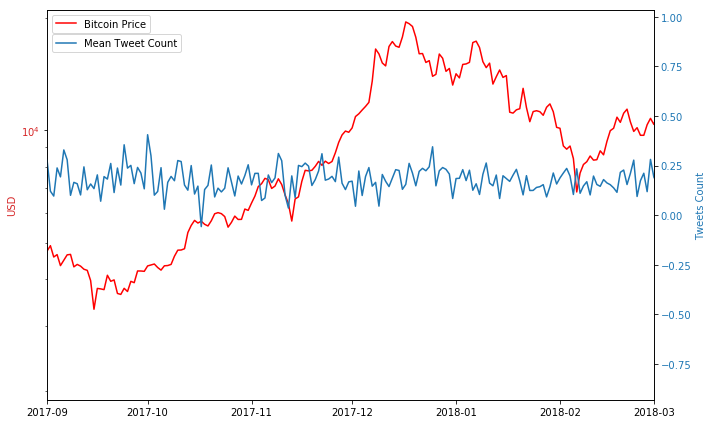

In [65]:
# generate plots, show fig
# some parameters can be adjusted, such as xlim, ylim, ylog, labels
fig, ax1 = plt.subplots(figsize = (10, 6))
color = 'tab:red'
ax1.set_ylabel('USD', color=color)
ax1.plot(df_analysis["Date"], df_analysis['BTC_Price'], label = "Bitcoin Price", color='red')
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
# ax1.set_ylim(2, 21000)
# ax1.set_ylim(10, 1200)
# ax1.set_ylim(600, 21000)
ax1.set_ylim(1900, 21000)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Tweets Count', color=color)
ax2.plot(df_analysis["Date"], df_analysis["analysis"], label = "Mean Tweet Count")
ax2.tick_params(axis='y', labelcolor=color)

ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))
plt.xlim(pd.Timestamp('2017-09-01'), pd.Timestamp('2018-03-01'))
# plt.xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2017-01-01'))
# ax2.set_ylim(-0.5, 0.9)
plt.tight_layout()
plt.savefig("Fig01.png")
plt.show()

In [59]:
# calculate correlation
corr = df_analysis["BTC_Price"].rolling(window=60, min_periods=5).corr(df_analysis["analysis"])

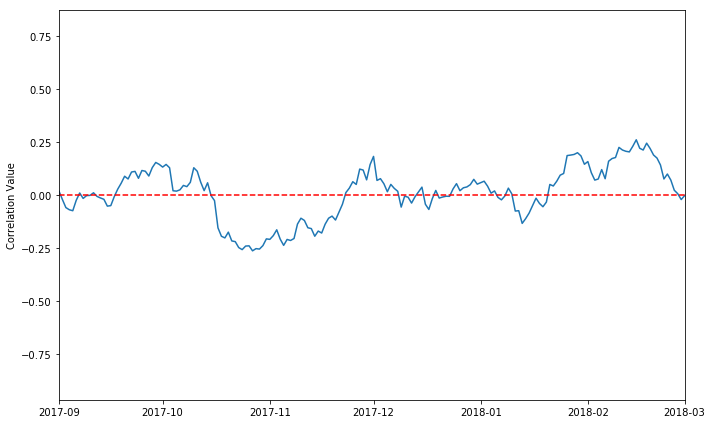

In [66]:
# generate plot to show correlation change
plt.figure(figsize=(10,6))
plt.plot(df_analysis["Date"], corr)
plt.xlim(pd.Timestamp('2017-09-01'), pd.Timestamp('2018-03-01'))
# plt.xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2017-01-01'))
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Correlation Value")
plt.savefig("Fig01b.png")
plt.tight_layout()
plt.show()